# Actividad Evaluable: Patrones con K-means
# Ruth Sarai Méndez Jiménez A01351642

## 2. Preparación de datos
Para realizar el análisis no se consideró la variable SkinThickness (grosor de la piel), ya que no es una variable que aporte información importante al análisis a realizar, así mismo como se mencionó en el trabajo pasado la variable BloodPressure (presión arterial) no tiene una correlación alta con el hecho de ser una persona diabetica, pero se sabe que si una persona es diabetica normalmente tiene la presión arterial alta, por lo que se consideró una variable importante.

In [3]:
import pandas as pd

In [4]:
diabetes=pd.read_csv("diabetes.csv")
diabetes_prep = diabetes.drop(["SkinThickness"], axis=1)

In [5]:
diabetes_prep.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [6]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Se puede observar que ya se tienen las variables más significativas y no se tienen valores nulos, solo resta quitar la variable Outcome ya que es la que determina si la persona tiene o no diabetes, y al ser un aprendizaje no supervisado se requiere de agrupamientos para poder realizar el análisis.

## 3. Valor de k
Para el análisis se consideró el valor de k=2, ya que en este caso se requieren de dos agrupamientos que nos indiquen unicamente si las personas tienen diabetes o no 

## 4.Scikitlearn 

In [7]:
#Quitar la variable de Outcome para proceder a realizar el análisis
diabetes_prep = diabetes_prep.drop(['Outcome'], axis=1)

## Versión 1

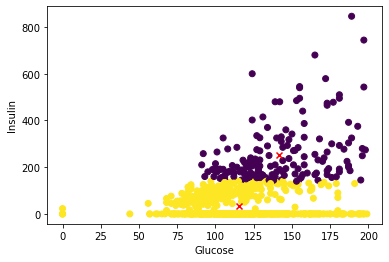

In [33]:
version1=diabetes_prep.loc[:,["Glucose","Insulin"]]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(version1)
labels = kmeans.predict(version1)

#gráqfica
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(diabetes_prep['Glucose'], diabetes_prep['Insulin'], c = labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

In [17]:
df = pd.DataFrame({'labels':labels, 'Outcome':diabetes['Outcome']})
crosstab = pd.crosstab(df['labels'],df['Outcome'])
crosstab

Outcome,0,1
labels,,
0,287,84
1,213,184


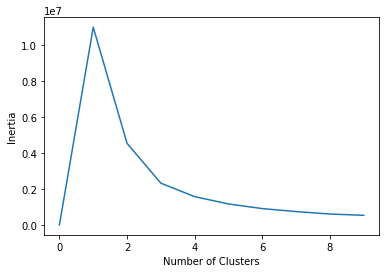

In [38]:
iner_list = np.empty(10)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(version1)
    iner_list[i] = kmeans.inertia_

# iner_list = iner_list%100
# show the best number in graph
plt.plot(range(0,10), iner_list,'-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Número de clusters: 3
Cluster Centers: [[129.27118644 158.79661017]
 [114.00404858  14.25303644]
 [158.44736842 441.28947368]]


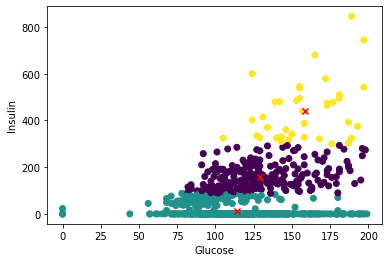

In [36]:
# Seleccionar dos variables y ver cómo se agrupan
version1=diabetes_prep.loc[:,["Glucose","Insulin"]]
# KMEANS_1
from sklearn.cluster import KMeans
kmeans_1 = KMeans(n_clusters=3)
kmeans_1.fit(version1)
labels_1 = kmeans_1.predict(version1)
list_clusters = np.unique(labels_1)
print("Número de clusters:",len(list_clusters))
print("Cluster Centers:",kmeans_1.cluster_centers_)


# visualization
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(diabetes_prep['Glucose'], diabetes_prep['Insulin'], c = labels_1)
plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

In [41]:
#KMeans usando todas las dimensiones
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=600) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(diabetes_prep)

KMeans(max_iter=600, n_clusters=2)

In [42]:
# Obtener las etiquetas de cluster asignadas a cada registro
labels = kmeans.labels_
# Ver el número total de etiquetas diferentes (Equivale a Número de clusters encontrados)
num_clusters = np.unique(labels)
print("Etiquetas de clusters:",num_clusters)
print("Total de Registros:",len(kmeans.labels_))
print("Centroides:", kmeans.cluster_centers_)
print("Total de variables que forman parte de un centroide:",len(kmeans.cluster_centers_[0]))

Etiquetas de clusters: [0 1]
Total de Registros: 768
Centroides: [[  3.89768977 115.3960396   68.17986799  32.75412541  31.21930693
    0.43894884  33.12541254]
 [  3.64814815 141.46296296  72.56790123 255.78395062  34.88518519
    0.59504938  33.67283951]]
Total de variables que forman parte de un centroide: 7


In [43]:
diabetes_nuevo=diabetes_prep.copy()
diabetes_nuevo.loc[:,'Outcome'] = diabetes['Outcome']
diabetes_nuevo.loc[:,'cluster'] = labels

diabetes_nuevo

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,6,148,72,0,33.6,0.627,50,1,0
1,1,85,66,0,26.6,0.351,31,0,0
2,8,183,64,0,23.3,0.672,32,1,0
3,1,89,66,94,28.1,0.167,21,0,0
4,0,137,40,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0,1
764,2,122,70,0,36.8,0.340,27,0,0
765,5,121,72,112,26.2,0.245,30,0,0
766,1,126,60,0,30.1,0.349,47,1,0


cluster
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

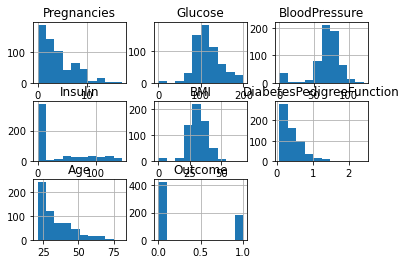

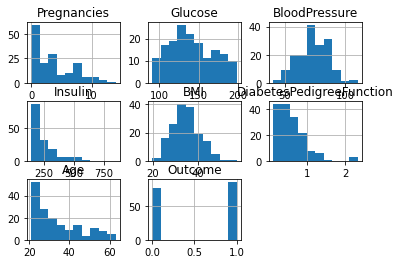

In [44]:
diabetes_nuevo.groupby("cluster").hist()

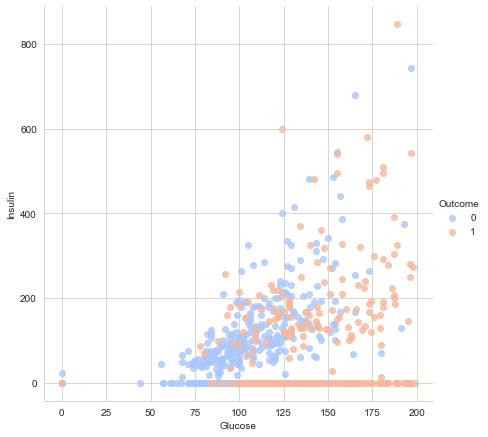

In [46]:
import seaborn as sns 
sns.set_style('whitegrid')
sns.lmplot(x='Glucose',y='Insulin',data=diabetes_nuevo, hue='Outcome',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

## Versión 2

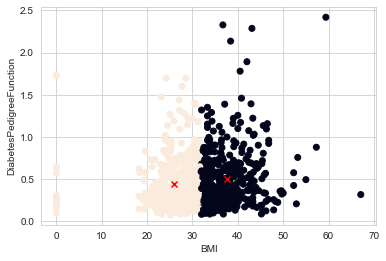

In [53]:
version2=diabetes_prep.loc[:,["BMI","DiabetesPedigreeFunction"]]
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(version2)
labels2 = kmeans2.predict(version2)

#gráqfica
plt.scatter(diabetes_prep['BMI'], diabetes_prep['DiabetesPedigreeFunction'], c = labels2)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('BMI')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()

In [54]:
df = pd.DataFrame({'labels2':labels2, 'Outcome':diabetes['Outcome']})
crosstab = pd.crosstab(df['labels2'],df['Outcome'])
crosstab

Outcome,0,1
labels2,,
0,213,184
1,287,84


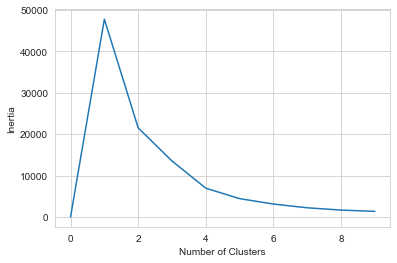

In [47]:
iner_list = np.empty(10)
for i in range(1,10):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(version2)
    iner_list[i] = kmeans2.inertia_

# iner_list = iner_list%100
# show the best number in graph
plt.plot(range(0,10), iner_list,'-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Número de clusters: 4
Cluster Centers: [[43.02        0.58141429]
 [25.29038462  0.43318077]
 [33.53501401  0.45829132]
 [ 0.          0.43327273]]


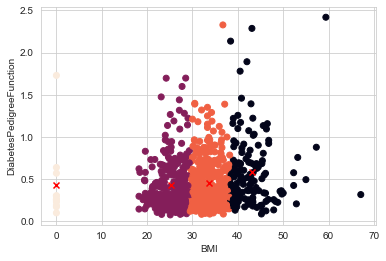

In [56]:
# Seleccionar dos variables y ver cómo se agrupan
version2=diabetes_prep.loc[:,["BMI","DiabetesPedigreeFunction"]]
# KMEANS_2
from sklearn.cluster import KMeans
kmeans_2 = KMeans(n_clusters=4)
kmeans_2.fit(version2)
labels_2 = kmeans_2.predict(version2)
list_clusters = np.unique(labels_2)
print("Número de clusters:",len(list_clusters))
print("Cluster Centers:",kmeans_2.cluster_centers_)


# visualization
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(diabetes_prep['BMI'], diabetes_prep['DiabetesPedigreeFunction'], c = labels_2)
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('BMI')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()

In [57]:
#KMeans usando todas las dimensiones
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=2, max_iter=600) # You want cluster the passenger records into 2: Survived or Not survived
kmeans2.fit(diabetes_prep)

KMeans(max_iter=600, n_clusters=2)

In [58]:
# Obtener las etiquetas de cluster asignadas a cada registro
labels2 = kmeans2.labels_
# Ver el número total de etiquetas diferentes (Equivale a Número de clusters encontrados)
num_clusters = np.unique(labels2)
print("Etiquetas de clusters:",num_clusters)
print("Total de Registros:",len(kmeans2.labels_))
print("Centroides:", kmeans2.cluster_centers_)
print("Total de variables que forman parte de un centroide:",len(kmeans2.cluster_centers_[0]))

Etiquetas de clusters: [0 1]
Total de Registros: 768
Centroides: [[  3.89768977 115.3960396   68.17986799  32.75412541  31.21930693
    0.43894884  33.12541254]
 [  3.64814815 141.46296296  72.56790123 255.78395062  34.88518519
    0.59504938  33.67283951]]
Total de variables que forman parte de un centroide: 7


In [59]:
diabetes_nuevo2=diabetes_prep.copy()
diabetes_nuevo2.loc[:,'Outcome'] = diabetes['Outcome']
diabetes_nuevo2.loc[:,'cluster'] = labels2

diabetes_nuevo

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,6,148,72,0,33.6,0.627,50,1,0
1,1,85,66,0,26.6,0.351,31,0,0
2,8,183,64,0,23.3,0.672,32,1,0
3,1,89,66,94,28.1,0.167,21,0,0
4,0,137,40,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0,1
764,2,122,70,0,36.8,0.340,27,0,0
765,5,121,72,112,26.2,0.245,30,0,0
766,1,126,60,0,30.1,0.349,47,1,0


cluster
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

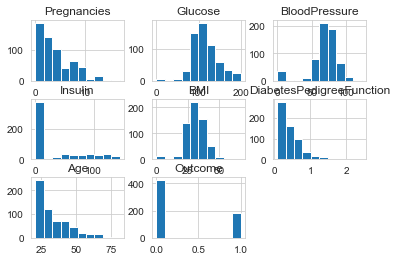

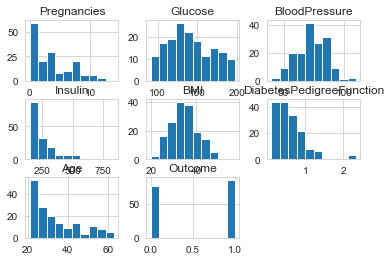

In [60]:
diabetes_nuevo2.groupby("cluster").hist()

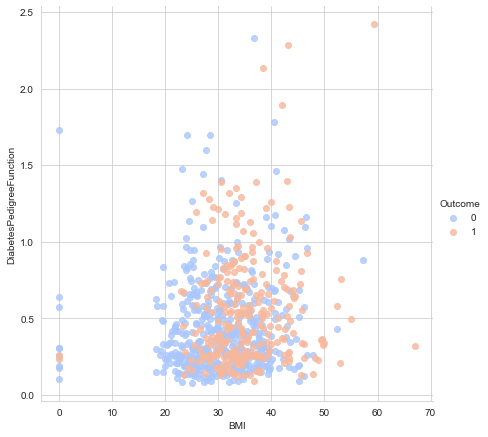

In [61]:
import seaborn as sns 
sns.set_style('whitegrid')
sns.lmplot(x='BMI',y='DiabetesPedigreeFunction',data=diabetes_nuevo2, hue='Outcome',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)